## Typeracer Data Analyzer:

A simple script that uses Pandas and Plotly to extract and visualize Typeracer.com race data

(Work in progress--more comments/explanations to come)


By Kenneth Burchfiel
Released under the MIT License


In [1]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import time
from datetime import timedelta
import kaleido
import os
from IPython.display import Image
# Note regarding kaleido: the most recent version didn't work for me. However,
# specifying an older version by entering conda install python-kaleido=0.1.0
# worked great. See https://github.com/plotly/Kaleido/issues/120 )
from generate_screenshot import generate_screenshot

In [2]:
include_last_n_races = 5000 # Will need to be updated manually once I 
username = 'kjb3'

Calculating how many races I've run (which will play a role in setting up the URL for the race table extraction):

In [3]:
user_table = pd.read_html(f'https://typeracerdata.com/profile?username={username}')[0]
race_count = int(user_table.iloc[0, 1])
race_count

4774

Extracting race data from typeracerdata.com:
(Note: I have a Typeracer Premium subscription, so I could also retrieve similar data from the Typeracer website. However, that data does not show decimal points for WPM values, so I prefer to retrieve the data from typeracerdata.com instead).

In [4]:
df_race_data = pd.read_html(f'https://typeracerdata.com/profile?username={username}&last={race_count}')[2]
df_race_data = df_race_data[['Race', 'Date', 'WPM', 'Outcome', 'Acc.']].copy().sort_values('Race').reset_index(drop=True)
df_race_data['Race'] = df_race_data['Race'].astype('int')
df_race_data

,Race,Date,WPM,Outcome,Acc.
0,1,2017-02-22 06:13:17,66.23,No win (2 of 5),86%
1,2,2017-02-22 06:13:49,96.24,Win (1 of 5),95%
2,3,2017-02-22 06:14:52,99.46,Win (1 of 5),97%
3,4,2017-02-22 06:15:51,82.35,No win (3 of 5),97%
4,5,2017-02-22 06:16:39,95.87,No win (2 of 2),97%
...,...,...,...,...,...
4769,4770,2022-11-10 03:06:03,141.95,Win (1 of 5),99%
4770,4771,2022-11-10 03:13:54,144.07,Win (1 of 5),99%
4771,4772,2022-11-10 03:14:38,138.05,Win (1 of 4),99%
4772,4773,2022-11-10 03:17:16,124.66,No win (3 of 5),98%


In [5]:
df_race_data.dtypes

Race         int32
Date        object
WPM        float64
Outcome     object
Acc.        object
dtype: object

The following cell reads Typeracer race data (which I downloaded from my Typeracer account) into a Pandas DataFrame, then calculates rolling and cumulative averages.

In [6]:
df_race_data['Last 10 Avg'] = df_race_data['WPM'].rolling(10).mean()
df_race_data['Last 100 Avg'] = df_race_data['WPM'].rolling(100).mean()
df_race_data['Last 1000 Avg'] = df_race_data['WPM'].rolling(1000).mean()
# The following line uses a list comprehension to generate a cumulative average
# of all WPM scores up until the current race. .iloc searches from 0 to i+1 for
# each row so that that row is included in the calculation.
df_race_data['cumulative_avg'] = [round(np.mean(df_race_data.iloc[0:i+1]['WPM']),3) for i in range(len(df_race_data))]
df_race_data

,Race,Date,WPM,Outcome,Acc.,Last 10 Avg,Last 100 Avg,Last 1000 Avg,cumulative_avg
0,1,2017-02-22 06:13:17,66.23,No win (2 of 5),86%,NaN,NaN,NaN,66.230
1,2,2017-02-22 06:13:49,96.24,Win (1 of 5),95%,NaN,NaN,NaN,81.235
2,3,2017-02-22 06:14:52,99.46,Win (1 of 5),97%,NaN,NaN,NaN,87.310
3,4,2017-02-22 06:15:51,82.35,No win (3 of 5),97%,NaN,NaN,NaN,86.070
4,5,2017-02-22 06:16:39,95.87,No win (2 of 2),97%,NaN,NaN,NaN,88.030
...,...,...,...,...,...,...,...,...,...
4769,4770,2022-11-10 03:06:03,141.95,Win (1 of 5),99%,130.230,125.7574,112.54441,120.743
4770,4771,2022-11-10 03:13:54,144.07,Win (1 of 5),99%,133.129,125.7449,112.66104,120.747
4771,4772,2022-11-10 03:14:38,138.05,Win (1 of 4),99%,135.504,125.7030,112.76067,120.751
4772,4773,2022-11-10 03:17:16,124.66,No win (3 of 5),98%,135.096,125.7502,112.84793,120.752


Top 20 races by WPM:

In [7]:
df_race_data.sort_values('WPM', ascending = False).head(20)

,Race,Date,WPM,Outcome,Acc.,Last 10 Avg,Last 100 Avg,Last 1000 Avg,cumulative_avg
3230,3231,2017-06-04 04:04:15,168.88,Win (1 of 4),100%,134.775,129.7076,132.48367,127.416
2601,2602,2017-05-26 01:17:35,168.63,No win (2 of 2),100%,134.123,132.6804,134.74438,126.415
1767,1768,2017-05-06 22:13:39,168.31,Win (1 of 3),100%,143.040,137.4863,126.51896,122.753
2949,2950,2017-05-31 01:15:26,167.48,Win (1 of 5),99%,135.967,131.9298,134.01532,127.327
2452,2453,2017-05-23 19:11:09,167.31,Win (1 of 5),100%,139.852,137.3607,134.34131,125.923
2230,2231,2017-05-19 18:39:25,167.12,Win (1 of 3),100%,139.504,132.0010,132.69777,125.144
3010,3011,2017-05-31 20:16:48,167.07,Win (1 of 5),100%,123.494,130.2214,133.48921,127.330
2735,2736,2017-05-28 02:49:40,166.67,No win (2 of 5),100%,142.113,135.6031,134.65379,126.916
1882,1883,2017-05-09 01:05:30,166.37,Win (1 of 2),100%,139.260,136.5011,128.83244,123.540
1763,1764,2017-05-06 22:09:37,166.29,Win (1 of 5),100%,134.443,137.2975,126.40354,122.698


Top 10 'Last 10 Average' values:

In [8]:
df_race_data.sort_values('Last 10 Avg', ascending = False).head(20)

,Race,Date,WPM,Outcome,Acc.,Last 10 Avg,Last 100 Avg,Last 1000 Avg,cumulative_avg
2354,2355,2017-05-21 20:30:08,127.80,No win (2 of 2),94%,148.676,131.5559,133.24225,125.450
2353,2354,2017-05-21 20:29:30,152.56,No win (2 of 3),99%,148.269,131.6631,133.26250,125.449
2355,2356,2017-05-21 20:30:51,146.70,No win (2 of 4),97%,147.641,131.9008,133.26256,125.459
2488,2489,2017-05-23 19:42:21,133.92,No win (2 of 2),93%,146.646,138.0520,134.82005,126.134
2024,2025,2017-05-12 20:54:12,139.55,Win (1 of 3),96%,146.585,138.3522,130.89226,124.415
2487,2488,2017-05-23 19:41:40,165.71,No win (2 of 4),100%,146.251,138.0452,134.81587,126.131
2026,2027,2017-05-12 20:56:14,153.17,Win (1 of 4),100%,146.245,138.4965,130.92753,124.432
2489,2490,2017-05-23 19:43:04,139.70,No win (2 of 2),92%,146.086,138.1436,134.83573,126.140
2021,2022,2017-05-12 20:51:30,157.37,Win (1 of 4),100%,145.836,137.4018,130.85041,124.388
2352,2353,2017-05-21 20:28:54,140.57,Win (1 of 4),99%,145.628,131.4461,133.22665,125.437


Creating interactive charts using Plotly express: (Note: because these are HTML files, they won't display on GitHub; instead, you'll need to download and run the Jupyter notebook on your computer to view them.)

In [10]:
race_line_plot = px.line(df_race_data, x = 'Race', y = ['WPM', 'Last 10 Avg', 'Last 100 Avg', 'Last 1000 Avg', 'cumulative_avg'])
race_line_plot.write_html('html_output/race_line_plot.html')
race_line_plot

Generating static version of this .html file using Kaleido:

In [11]:
image_width = 3000 # Interestingly, when I tried setting the image width as 3840 (e.g. UHD resolution), the x axis did not line up properly with the chart.)
image_height = image_width * 9/16
race_line_plot.write_image('png_output/race_line_plot_using_kaleido.png', width = image_width, height = image_height, engine = 'kaleido')
# See https://plotly.com/python/static-image-export/

Here's a copy of the image:

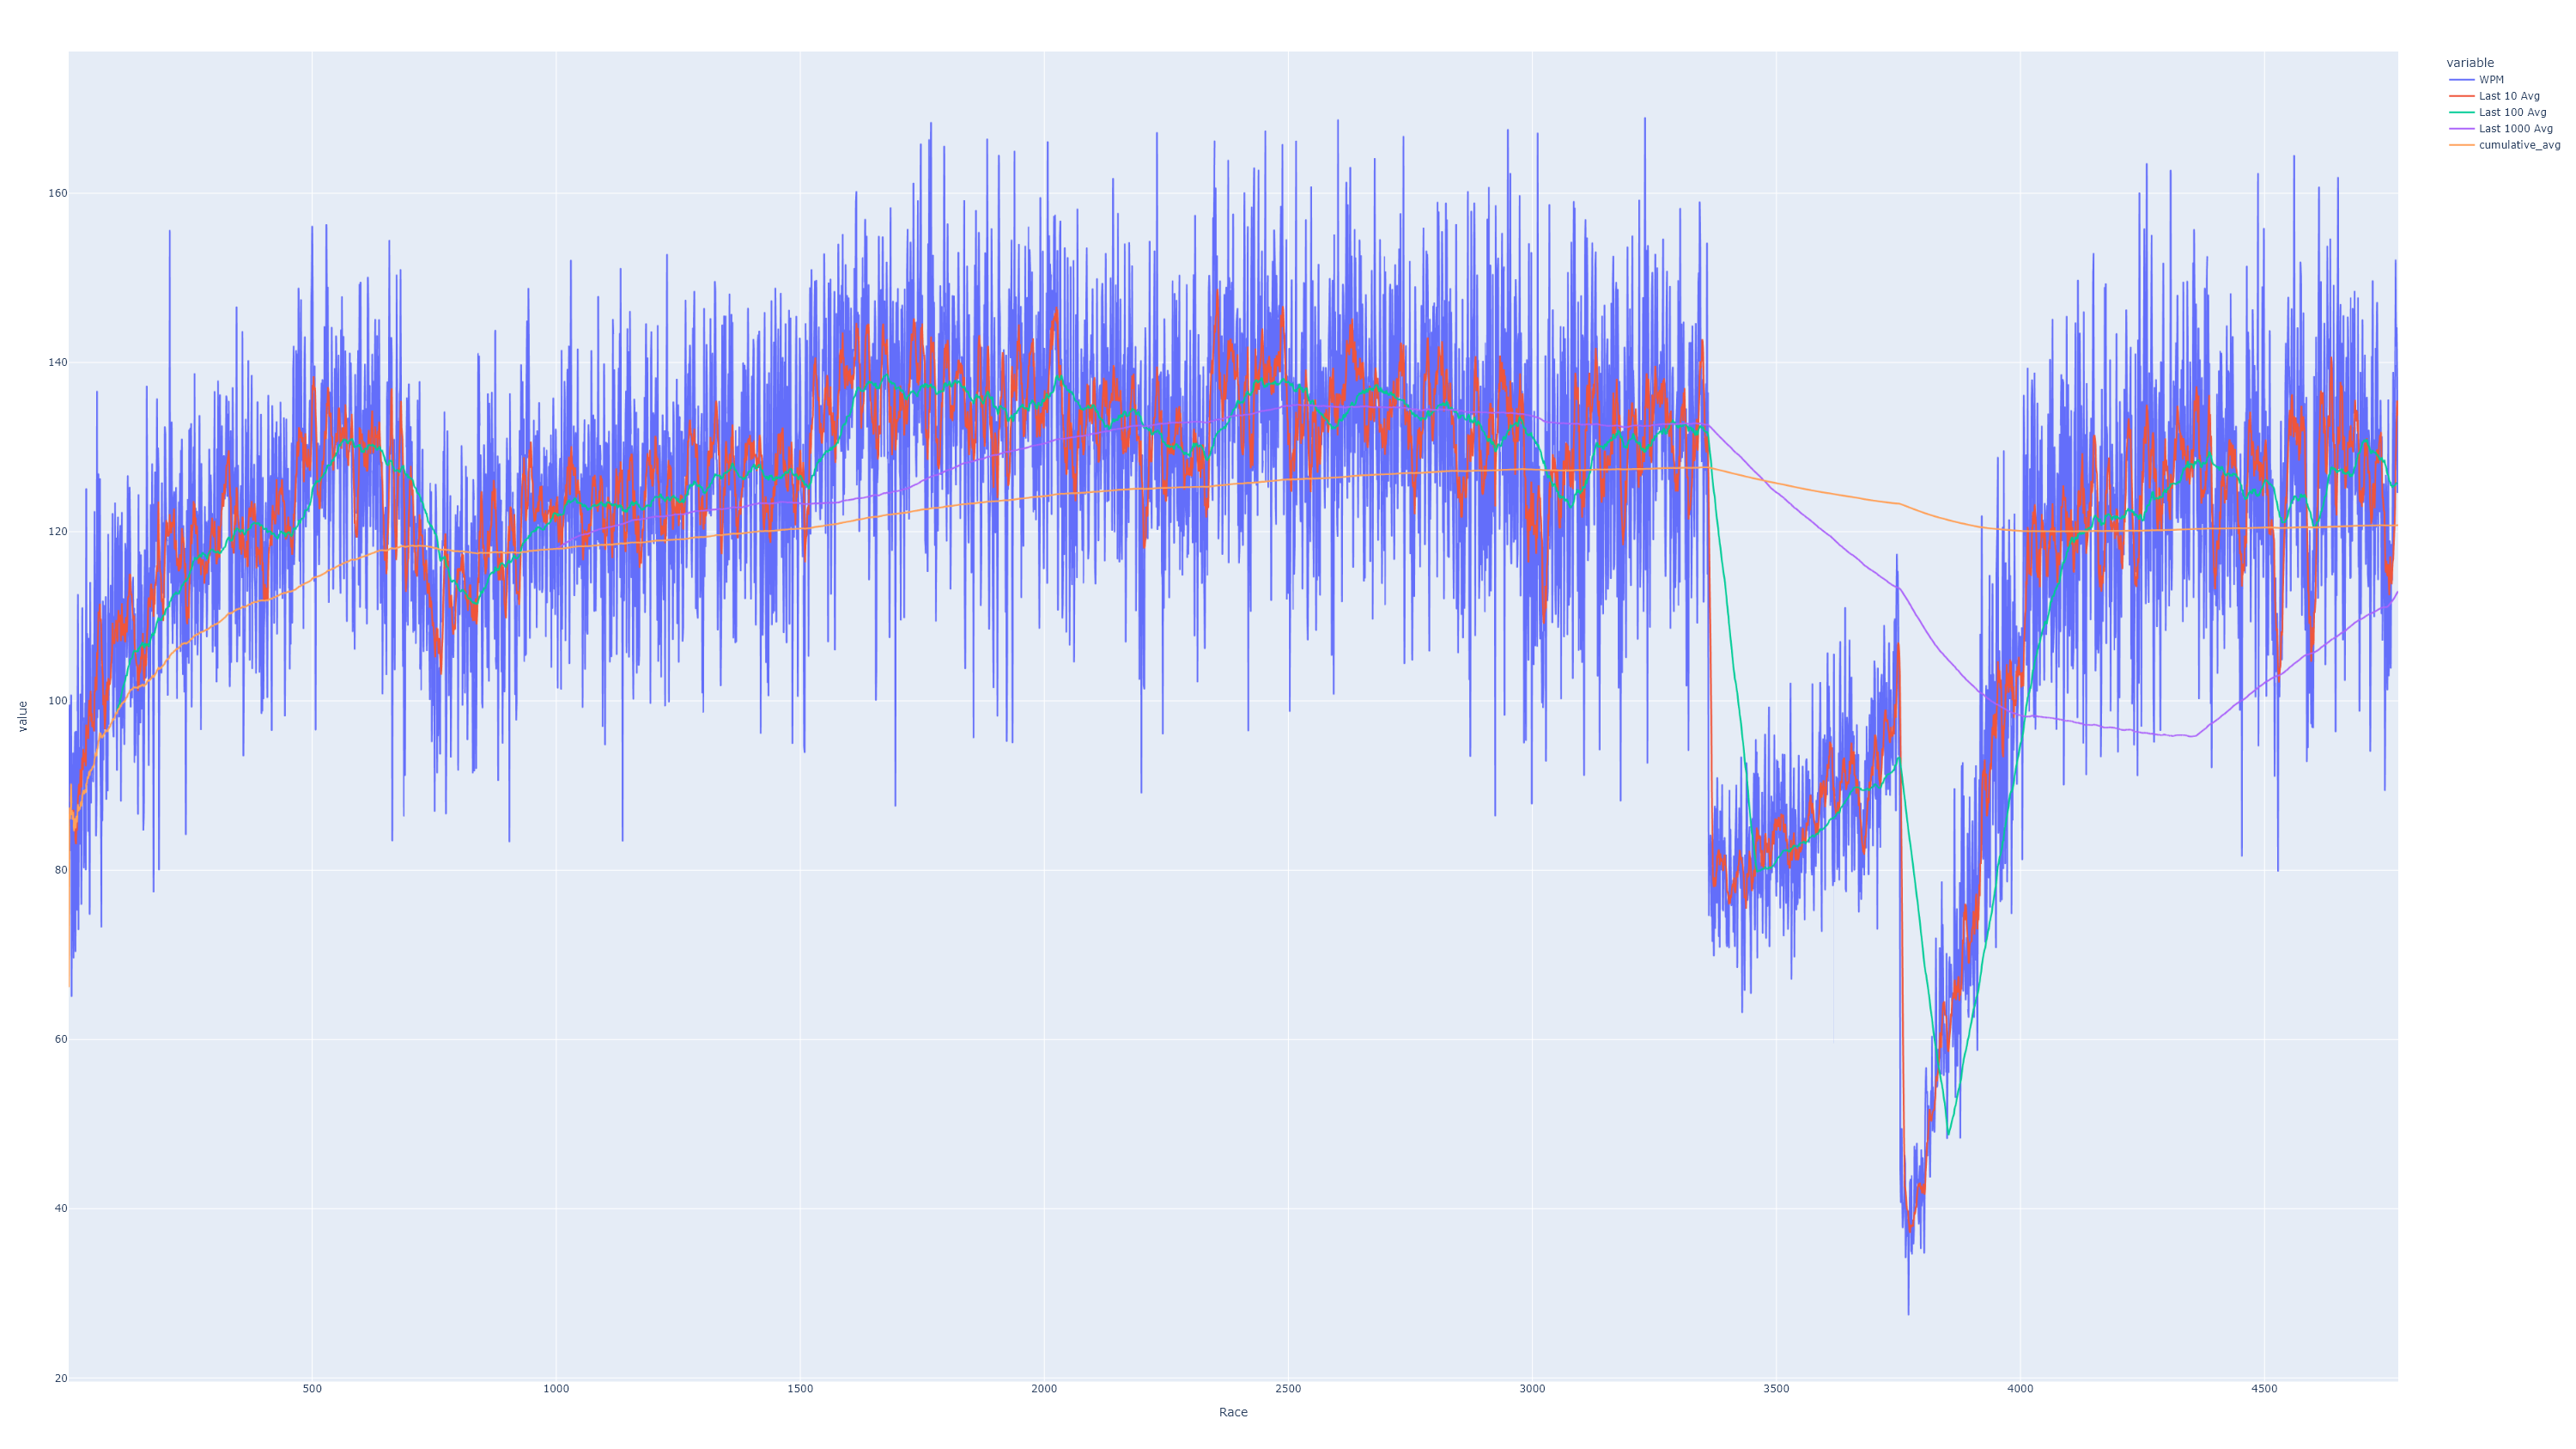

In [12]:
Image(filename = 'png_output/race_line_plot_using_kaleido.png')

Alternate method of generating the screenshot by using Selenium and a web browser: (the output is quite similar)

In [13]:
generate_screenshot(
path_to_html = os.path.join(os.getcwd(), 'html_output'),
html_name = 'race_line_plot.html', 
path_to_image = os.path.join(os.getcwd(), 'png_output'), 
image_name = 'race_line_plot_using_generate_screenshot', 
image_extension = '.png',
window_width = 3000) 
# See https://docs.python.org/3/library/os.path.html for the use of os.path.join().

Saving to: c:\Users\kburc\D1V1\Documents\!Dell64docs\Programming\py\kjb3_programs\typeracer_data_analyzer\png_output\race_line_plot_using_generate_screenshot.png
